# Loan Repayment Decision Model

Welcome to my Notebook !!

- UNDERSTANDING THE PROBLEM STATEMENT

Here, we are building an automated model which will reduce the time taken by the bank to manually validate the    customer eligibility for loan based on customer information, and will also ensure the Bank to get the money back.

In [1]:
# importing libraries
import pandas as pd # for data handling
import numpy as np # for mathematical calculations
import seaborn as sns # for data visualisations
import matplotlib.pyplot as plt # for plotting graphs
%matplotlib inline
import warnings # to ignore warnings
warnings.filterwarnings("ignore")
from sklearn import metrics

Reading the Data

In [2]:
data = pd.read_csv("data_set.csv")

Let's make a copy of the original dataset so that we don't lose the original dataset after making changes.

In [3]:
data_original = data.copy()

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## 1. Variable Identification 

Here, we will try to identify the Input data and the Target Variable(Output Data) and their data-types.

In [5]:
# getting column names of variables
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
# getting data-types
print("Data Types of the columns are:\n\n", data.dtypes)

Data Types of the columns are:

 Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object


In [7]:
# shape of the dataset
print("Shape of the dataset is :\n", data.shape)

Shape of the dataset is :
 (614, 13)


There are 614 rows and 13 columns in the dataset.

- Categorical Variables:Gender, Married, Dependents, Education, Self_Employed, Property_Area, Loan_Status
- Continuous Variables: { ApplicantIncome (int64 format - integer variable)}, {CoapplicantIncome, LoanAmount,   Loan_Amount_Term, Credit_History(float64 format - Numerical values having decimal values involved)}

Target Variable : Loan_Status.

As, we can clearly see that this is a Classification Problem where we have to predict whether the loan would be approved or not on the basis of customer information. Since there are two classes as Y/N this is a Binary Classification Problem.

- HYPOTHESIS GENERATION

Now, after carefully studing the problem and looking at the variable/column fetaures in the dataset, we can come up with some of our own assumptions/hypothesis. It is basically thinking of the features that might affect the output though our assumption may or may not be always correct in reality. Let's talk about some of them below:

- Loan Amount : Higher the Loan Amount the lesser is tha chance to repay back and vice-versa.
- Salary : Higher the salary, higher the chances of the loan repayment and hence Loan approved chances should be high.
- Loan_Amount_Term : For a lower amount with lower term, chances to approve the loan should be higher.
- Credit_History : If the previous history is good means that higher the chance of loan approval.

## 2. Univariate Analysis

- CATEGORICAL VARIABLES

In [8]:
# Gender
data['Gender'].value_counts(normalize=True)*100   # percentage wise

Male      81.364393
Female    18.635607
Name: Gender, dtype: float64

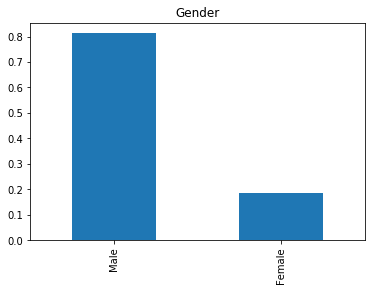

In [9]:
data['Gender'].value_counts(normalize=True).plot.bar(title = "Gender")

- 80% entries are of Male in the form.

In [10]:
# Married
data['Married'].value_counts(normalize=True)*100   # percentage wise

Yes    65.139116
No     34.860884
Name: Married, dtype: float64

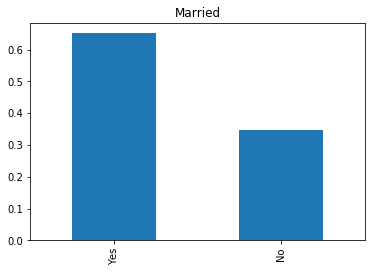

In [11]:
data['Married'].value_counts(normalize=True).plot.bar(title = "Married")

- 65% of entries are Married in the dataset.

In [12]:
# ORDINAL
# Dependents
data['Dependents'].value_counts(normalize=True)*100   # percentage wise

0     57.595993
1     17.028381
2     16.861436
3+     8.514190
Name: Dependents, dtype: float64

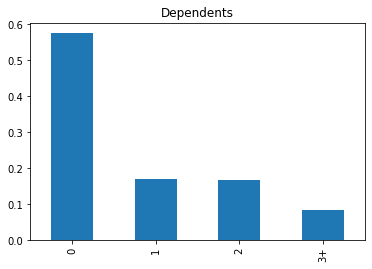

In [13]:
data['Dependents'].value_counts(normalize=True).plot.bar(title = "Dependents")

- Roughly 58% have "0" dependents, 18% have "1" dependents, 18% have "2" dependents, 6% have "3+" dependents in the dataset.

In [14]:
# ORDINAL
# Education
data['Education'].value_counts(normalize=True)*100   # percentage wise

Graduate        78.175896
Not Graduate    21.824104
Name: Education, dtype: float64

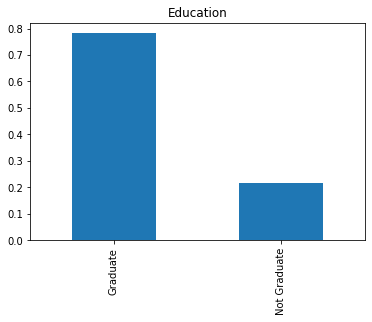

In [15]:
data['Education'].value_counts(normalize=True).plot.bar(title = "Education")

- Around 78% of the people are Graduates and 22% are non-graduates.

In [16]:
# Self_Employed
data['Self_Employed'].value_counts(normalize=True)*100   # percentage wise

No     85.910653
Yes    14.089347
Name: Self_Employed, dtype: float64

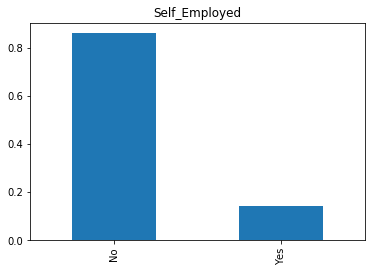

In [17]:
data['Self_Employed'].value_counts(normalize=True).plot.bar(title = "Self_Employed")

- Around 15% people are self-employed.

In [18]:
# ORDINAL
# Property_Area
data['Property_Area'].value_counts(normalize=True)*100   # percentage wise

Semiurban    37.947883
Urban        32.899023
Rural        29.153094
Name: Property_Area, dtype: float64

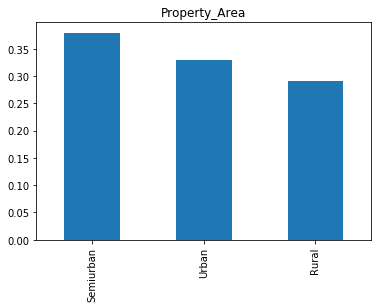

In [19]:
data['Property_Area'].value_counts(normalize=True).plot.bar(title = "Property_Area")

- Majority of people (~38%) are from semiurban area.

In [20]:
# Credit_History
data['Credit_History'].value_counts(normalize=True)*100   # percentage wise

1.0    84.219858
0.0    15.780142
Name: Credit_History, dtype: float64

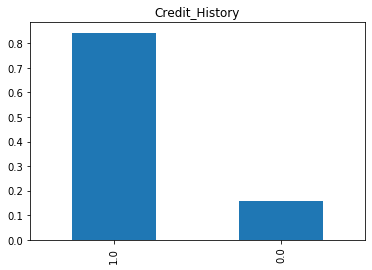

In [21]:
data['Credit_History'].value_counts(normalize=True).plot.bar(title = "Credit_History")

- Roughly 84% people fall in "1" credit_history category which might mean they have a positive credit_history (which is denoted here by 1).
- Though it is a float64 dtype, but "1.0" is simply treated as being a Positive Credit History and "0.0" will be treated as Negative Credit History. It is more Logical.

- CONTINUOUS VARIABLES

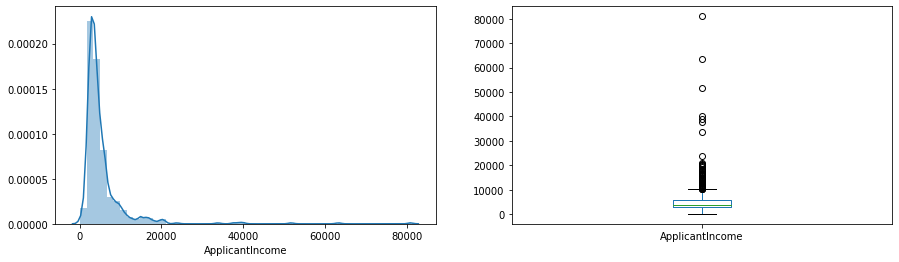

In [22]:
# distplot gives the histogram
plt.figure(1)
plt.subplot(121)
sns.distplot(data['ApplicantIncome']);
plt.subplot(122)
data['ApplicantIncome'].plot.box(figsize=(15,4)) 
plt.show()

Here, we can clearly say that the distribution is not a normal distribution. It is towards left and hence can be converted into normal distribution by square/cube or exponential transformation later on.

Also, looking at the Box Plot, there are a lot of outliers present.

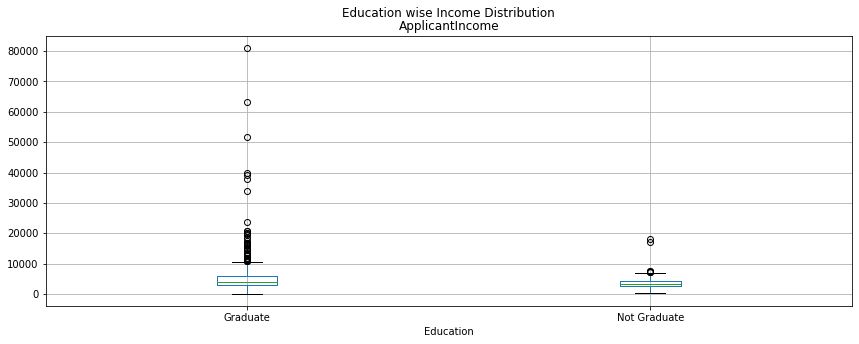

In [23]:
data.boxplot(column='ApplicantIncome', by="Education", figsize=(14,5))
plt.suptitle("Education wise Income Distribution")
plt.show()

Graduates earn a higher income as compared to non-graduates who earns lesser income.

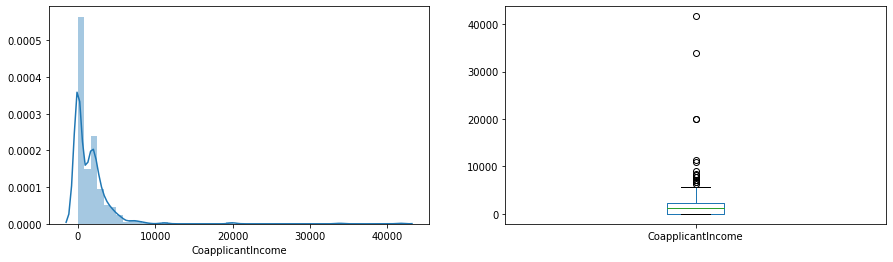

In [24]:
# CoapplicantIncome
plt.figure(1)
plt.subplot(121)
sns.distplot(data['CoapplicantIncome']);
plt.subplot(122)
data['CoapplicantIncome'].plot.box(figsize=(15,4)) 
plt.show()

Distribution is not normally distributed and outliers are present here too.

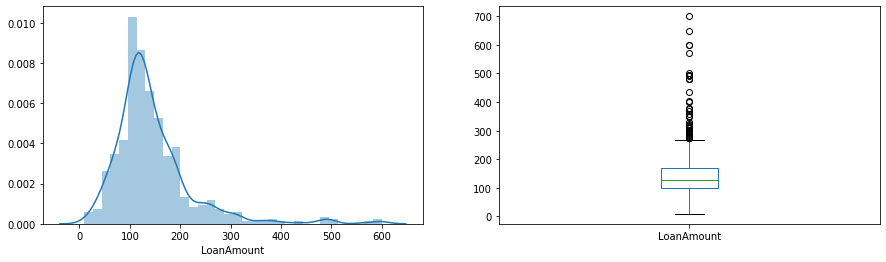

In [25]:
# LoanAmount
plt.figure(1)
plt.subplot(121)
df = data.dropna() # dropna is performed to drop the NaN values to avoid ValueError: cannot convert float NaN to integer
sns.distplot(df['LoanAmount']);
plt.subplot(122)
data['LoanAmount'].plot.box(figsize=(15,4))
plt.show()

A lot of outliers are present and the distribution is also not exact normal but it is fair to a certain degree.

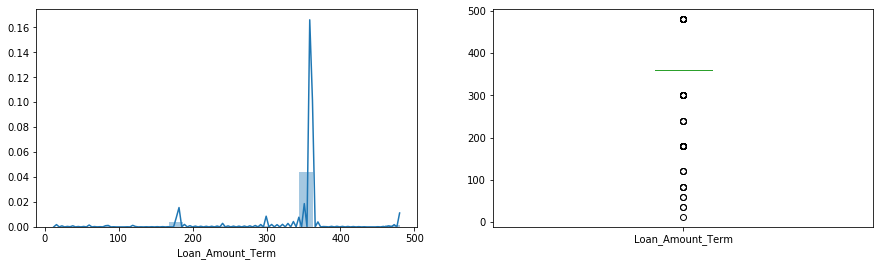

In [26]:
# Loan_Amount_Term
plt.figure(1)
plt.subplot(121)
#df = data.dropna() # dropna is performed to drop the NaN values to avoid ValueError: cannot convert float NaN to integer
sns.distplot(data['Loan_Amount_Term']);
plt.subplot(122)
data['Loan_Amount_Term'].plot.box(figsize=(15,4))
plt.show()

A lot of outliers are present and the distribution is also not exact normal but it is fair to a certain degree.

- TARGET VARIABLE

In [27]:
data["Loan_Status"].value_counts(normalize=True)*100   # percentage wise

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

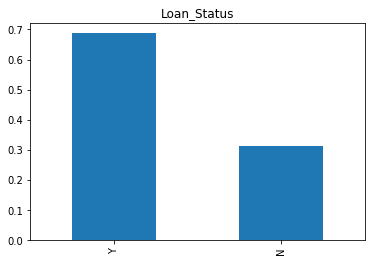

In [28]:
data["Loan_Status"].value_counts(normalize=True).plot.bar(title = 'Loan_Status')

- Roughly 69% obserations falls in "Y" Yes Category for Loan Approval.

## 3. Bivariate Analysis 

Now, let's try to identify the relation if any between the target variable and input variables one by one.

First let's deal with CATEGORICAL vs CATEGORICAL bivariate analysis.

- CATEGORICAL vs CONTINUOUS combinations : (Loan_Status, ApplicantIncome); (Loan_Status, CoApplicantIncome); (Loan_Status, LoanAmount); (Loan_Status, Loan_Amount_Term).

- CATEGORICAL vs CATEGORICAL combinations: (Loan_Status, Gender), (Loan_Status, Married), (Loan_Status, Dependents), (Loan_Status, Education), (Loan_Status, Self-Employed), (Loan_Status, Credit_History), (Loan_Status, Property_Area)

<Figure size 720x720 with 0 Axes>

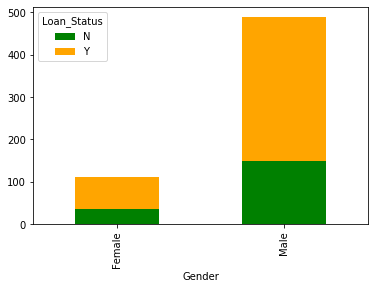

In [29]:
plt.figure(figsize=(10,10))
df = pd.crosstab(data['Gender'],data['Loan_Status'])
df.plot(kind='bar', stacked= True ,color =['green','orange'],grid=False)

Males have high probability of Laon Approval.

<Figure size 720x720 with 0 Axes>

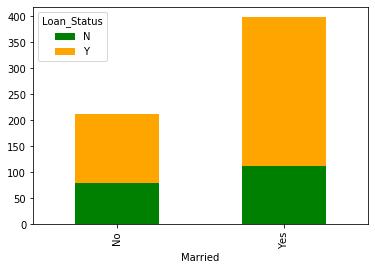

In [30]:
plt.figure(figsize=(10,10))
df = pd.crosstab(data['Married'],data['Loan_Status'])
df.plot(kind='bar', stacked= True ,color =['green','orange'],grid=False)

Married people have higher probability of Loan Approval

<Figure size 720x720 with 0 Axes>

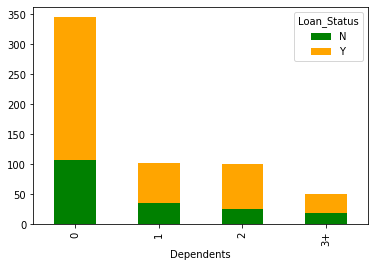

In [31]:
plt.figure(figsize=(10,10))
df = pd.crosstab(data['Dependents'],data['Loan_Status'])
df.plot(kind='bar', stacked= True ,color =['green','orange'],grid=False)

People without any Dependent have higher chances of Loan Approval.

<Figure size 720x720 with 0 Axes>

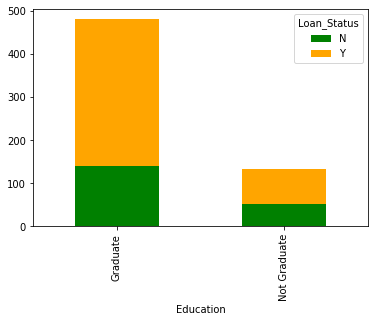

In [32]:
plt.figure(figsize=(10,10))
df = pd.crosstab(data['Education'],data['Loan_Status'])
df.plot(kind='bar', stacked= True ,color =['green','orange'],grid=False)

Graduates have higher chances of Loan Approval.

<Figure size 720x720 with 0 Axes>

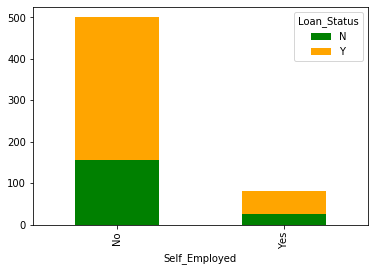

In [33]:
plt.figure(figsize=(10,10))
df = pd.crosstab(data['Self_Employed'],data['Loan_Status'])
df.plot(kind='bar', stacked= True ,color =['green','orange'],grid=False)

Self_Employed people have lower chance of Loan Approval.

<Figure size 720x720 with 0 Axes>

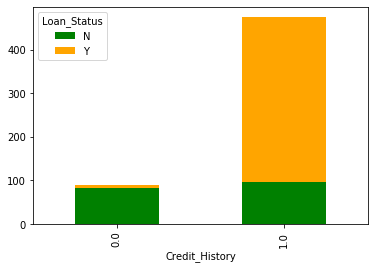

In [34]:
plt.figure(figsize=(10,10))
df = pd.crosstab(data['Credit_History'],data['Loan_Status'])
df.plot(kind='bar', stacked= True ,color =['green','orange'],grid=False)

If the credit history is good, then chances of Loan Approval are higher.

<Figure size 720x720 with 0 Axes>

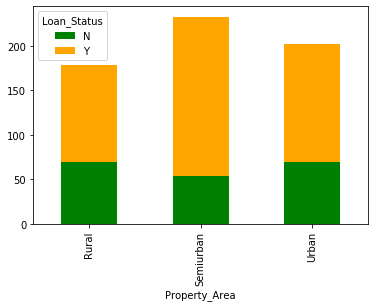

In [35]:
plt.figure(figsize=(10,10))
df = pd.crosstab(data['Property_Area'],data['Loan_Status'])
df.plot(kind='bar', stacked= True ,color =['green','orange'],grid=False)

People demanding Loan for house in in SemiUrban area have higher chance of Loan Approval.

Let's Look at the Correlation Plot for the variables. We changed 3+ to 3 and "N" with "0", and "Y" with "1" respectively.

In [36]:
data['Dependents'].replace('3+', 3,inplace=True)
data['Loan_Status'].replace('N', 0,inplace=True)
data['Loan_Status'].replace('Y', 1,inplace=True)

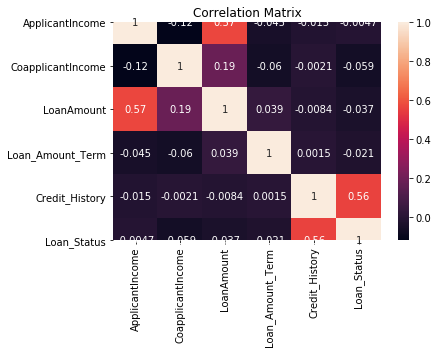

In [37]:
plt.title('Correlation Matrix')
sns.heatmap(data.corr(),annot=True)

High Correlation between:(ApplicantIncome - LoanAmount) and (Credit_History - Loan_Status).

-  CATEGORICAL vs CONTINUOUS bivariate analysis

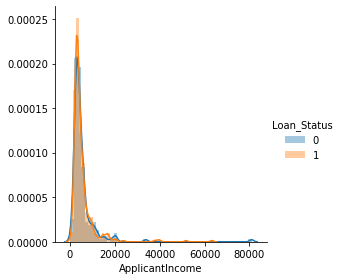

In [38]:
import seaborn as sns
sns.set_style = {"whitegrid"};
sns.FacetGrid(data, hue = "Loan_Status", size = 4)\
    .map(sns.distplot, "ApplicantIncome")\
    .add_legend();
plt.show()

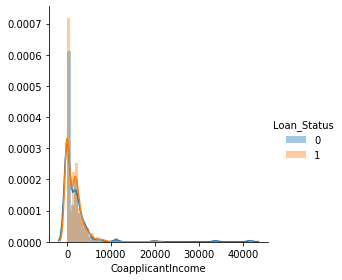

In [39]:
sns.set_style = {"whitegrid"};
sns.FacetGrid(data, hue = "Loan_Status", size = 4)\
    .map(sns.distplot, "CoapplicantIncome")\
    .add_legend();
plt.show()

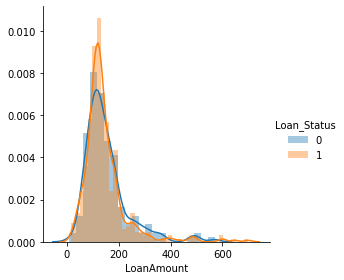

In [40]:
sns.set_style = {"whitegrid"};
sns.FacetGrid(data, hue = "Loan_Status", size = 4)\
    .map(sns.distplot, "LoanAmount")\
    .add_legend();
plt.show()

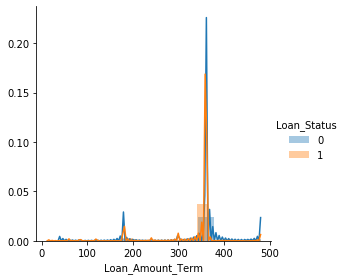

In [41]:
sns.set_style = {"whitegrid"};
sns.FacetGrid(data, hue = "Loan_Status", size = 4)\
    .map(sns.distplot, "Loan_Amount_Term")\
    .add_legend();
plt.show()

This analysis doesn't give senseful results though.

## 3. Missing Value Treatment 

In [42]:
# checking missing data percentage in data
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
missing_Data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [43]:
missing_Data.head(30)

,Total,Percent
Credit_History,50,8.143322
Self_Employed,32,5.211726
LoanAmount,22,3.583062
Dependents,15,2.442997
Loan_Amount_Term,14,2.280130
Gender,13,2.117264
Married,3,0.488599
Loan_Status,0,0.000000
Property_Area,0,0.000000
CoapplicantIncome,0,0.000000


Here, we can clearly see that some columns have missing values , but missing values are not high in number. We can use Mean/Median for Continuous variables, and Mode for categorical variables here.

Filling the Categorical Variables with Mode value.

In [44]:
data["Gender"].fillna(data["Gender"].mode()[0],inplace=True)
data["Married"].fillna(data["Married"].mode()[0],inplace=True)
data['Dependents'].fillna(data["Dependents"].mode()[0],inplace=True)
data["Self_Employed"].fillna(data["Self_Employed"].mode()[0],inplace=True)
data["Credit_History"].fillna(data["Credit_History"].mode()[0],inplace=True)

Regarding the Loan_Amount_Term variable we can clearly see in the plot that "360" value ocurs mostly and the distribution is also not normal. So, we fill it with "360" mode value.

In [45]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True)

As for Loan_Amount variable the plot clearly shows that it is not a normally distributed curve. Also, it has profusion of outliers, so Mean is not a good way to fill missing value because it is highly affected by presence of outliers and hence we will use Median to fill missing values.

In [46]:
data['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

Let's check again the Missing Value Percentages

In [47]:
# checking missing data percentage in data
total = data.isnull().sum().sort_values(ascending = False)
percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
missing_Data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [48]:
missing_Data.head(30)

,Total,Percent
Loan_Status,0,0.0
Property_Area,0,0.0
Credit_History,0,0.0
Loan_Amount_Term,0,0.0
LoanAmount,0,0.0
CoapplicantIncome,0,0.0
ApplicantIncome,0,0.0
Self_Employed,0,0.0
Education,0,0.0
Dependents,0,0.0


Great !! Now, we do not have any Missing Value in the Dataset.

## 4. Outlier Detection 

As, we already saw in univariate analysis that LoanAmount had outliers. We now, need to deal with them.
Let's take log transformation since it is a right skewed distribution.

In [49]:
data['LoanAmount_log_transformed'] = np.log(data['LoanAmount']) 

## 5. Feature Engineering 

Let's look at the ApplicantIncome, and CoapplicantIncome columns. We can introduce a new feature from these two and make a new feature called TotalIncome. General assumption can be higher the TotalIncome, higher the Loan Approval chances.

- Feature1: TotalIncome

In [50]:
data["TotalIncome"] = data["ApplicantIncome"] + data["CoapplicantIncome"]

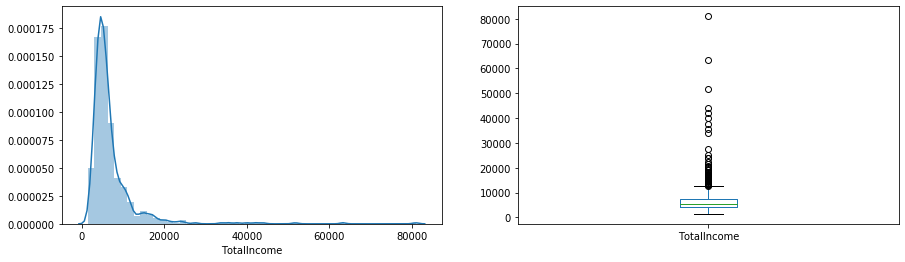

In [51]:
# TotalIncome
plt.figure(1)
plt.subplot(121)
#df = data.dropna() # dropna is performed to drop the NaN values to avoid ValueError: cannot convert float NaN to integer
sns.distplot(data['TotalIncome']);
plt.subplot(122)
data['TotalIncome'].plot.box(figsize=(15,4))
plt.show()

It is not a normally distributed curve and has profusion of outliers. It is a right skewed curve and hence make it into normally distributed curve by using log transformation like above.

In [52]:
data['TotalIncome_log_transformed'] = np.log(data['TotalIncome']) 

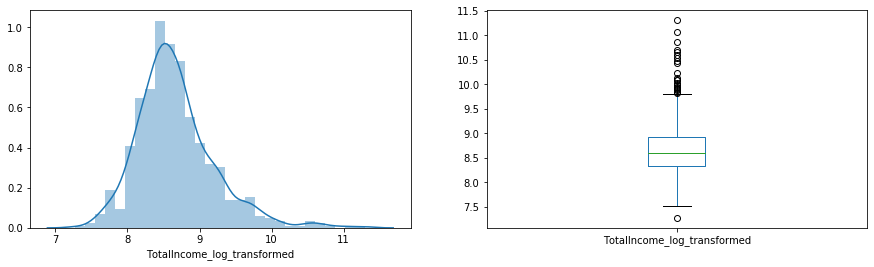

In [53]:
# TotalIncome_log_transformed
plt.figure(1)
plt.subplot(121)
#df = data.dropna() # dropna is performed to drop the NaN values to avoid ValueError: cannot convert float NaN to integer
sns.distplot(data['TotalIncome_log_transformed']);
plt.subplot(122)
data['TotalIncome_log_transformed'].plot.box(figsize=(15,4))
plt.show()

Now, it is more close to Normal Distribution and extreme values have been subsided.

- Feature 2: EMI (Equated Monthly Installment)

- A = P*r*(1+r)^N;
- B = (1+r)^(N-1);
- EMI = A/B;
- P=Loan Amount, N is Loan Amount Term, r = rate of interest (taking 9% here)


In [54]:
data["EMI"] = (data["LoanAmount"]*0.09*(1.09**data["Loan_Amount_Term"]))/(1.09**(data["Loan_Amount_Term"]-1))

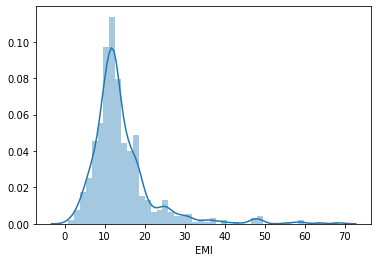

In [55]:
sns.distplot(data["EMI"])

- Feature 3: Balance_Income

In [56]:
data["Balance_Income"] = data["TotalIncome"]-data["EMI"]*1000 # To make the units equal we multiply with 1000

Dropping Correlated Variables, and noise.

In [57]:
data = data.drop(["ApplicantIncome","CoapplicantIncome","LoanAmount","Loan_Amount_Term", "TotalIncome"],axis=1)

In [58]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmount_log_transformed,TotalIncome_log_transformed,EMI,Balance_Income
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,1,4.852030,8.674026,12.5568,-6707.8
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,0,4.852030,8.714568,12.5568,-6465.8
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,1,4.189655,8.006368,6.4746,-3474.6
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,1,4.787492,8.505323,11.7720,-6831.0
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,1,4.948760,8.699515,13.8321,-7832.1


Let's drop the Loan_ID as it does not have any affect on Loan Approval, and it is a unique feature here.

In [59]:
data = data.drop("Loan_ID",axis=1)

In [60]:
X=data.drop("Loan_Status",1)

In [61]:
y=data[["Loan_Status"]]

In [62]:
len(X), len(y)

(614, 614)

In [63]:
X.head(2)

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmount_log_transformed,TotalIncome_log_transformed,EMI,Balance_Income
0,Male,No,0,Graduate,No,1.0,Urban,4.85203,8.674026,12.5568,-6707.8
1,Male,Yes,1,Graduate,No,1.0,Rural,4.85203,8.714568,12.5568,-6465.8


In [64]:
y.head(2)

,Loan_Status
0,1
1,0


In [65]:
# Converting the Categorical Variables into Numericals
X = pd.get_dummies(X)

In [66]:
X.head()

,Credit_History,LoanAmount_log_transformed,TotalIncome_log_transformed,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,4.852030,8.674026,12.5568,-6707.8,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
1,1.0,4.852030,8.714568,12.5568,-6465.8,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
2,1.0,4.189655,8.006368,6.4746,-3474.6,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
3,1.0,4.787492,8.505323,11.7720,-6831.0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1
4,1.0,4.948760,8.699515,13.8321,-7832.1,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1


In [67]:
X1=X

In [68]:
X1

,Credit_History,LoanAmount_log_transformed,TotalIncome_log_transformed,EMI,Balance_Income,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_3,Dependents_0,Dependents_1,Dependents_2,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1.0,4.852030,8.674026,12.5568,-6707.8,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
1,1.0,4.852030,8.714568,12.5568,-6465.8,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0
2,1.0,4.189655,8.006368,6.4746,-3474.6,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1
3,1.0,4.787492,8.505323,11.7720,-6831.0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1
4,1.0,4.948760,8.699515,13.8321,-7832.1,0,1,1,0,0,1,0,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,1.0,4.262680,7.972466,6.9651,-4065.1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0
610,1.0,3.688879,8.320205,3.9240,182.0,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0
611,1.0,5.533389,9.025456,24.8193,-16507.3,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
612,1.0,5.231109,8.933664,18.3447,-10761.7,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1


## Feature Scaling 

In [69]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

## Splitting the Dataset into Training and Test set

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------

- Tuned SVM

## Training SVM on Training Set

In [72]:
from sklearn.svm import SVC
classifier = SVC(C = 1, kernel = 'linear', random_state = 0)
classifier.fit(x_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

## Predicting Test Set results 

In [73]:
y_pred_svm = classifier.predict(x_test)

## Applying K-Fold Cross Validation

In [74]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 81.82 %
Standard Deviation: 3.06 %


## Applying Grid Search to find the best model and the best parameters

In [75]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
              {'C': [1, 10, 100, 1000], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}]
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 81.82 %
Best Parameters: {'C': 1, 'kernel': 'linear'}


/Users/shubhamsunwalka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Making Confusion Matrix

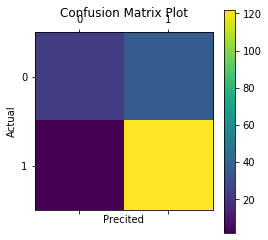

In [76]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_svm)
plt.matshow(cm)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Precited')
plt.ylabel('Actual')
plt.show();

In [77]:
print(metrics.classification_report(y_test, y_pred_svm, digits=6))

              precision    recall  f1-score   support

           0   0.923077  0.393443  0.551724        61
           1   0.767296  0.983871  0.862191       124

    accuracy                       0.789189       185
   macro avg   0.845186  0.688657  0.706957       185
weighted avg   0.818661  0.789189  0.759821       185



- High Precision, and accuracy is 0.789

- ROC Curve


In [78]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_svm)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Area Under Curve is :", roc_auc)

ROC Area Under Curve is : 0.6886567953463776


Text(0.5, 0, 'False Positive Rate')

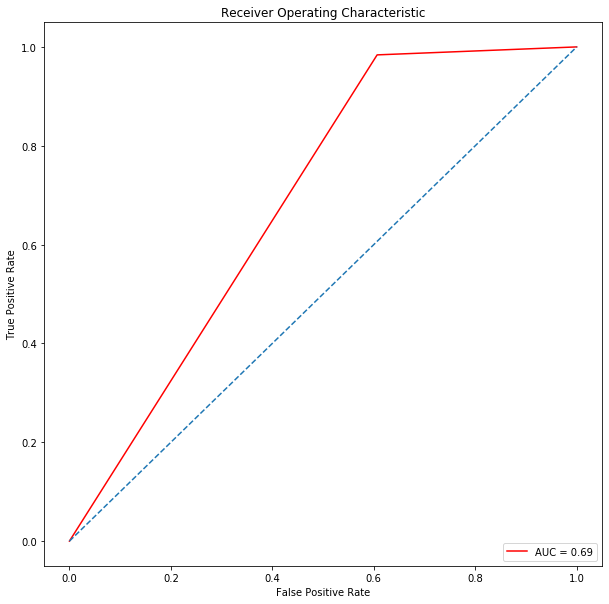

In [79]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

- Blue dotted lines represent noskill line which gives roc area of 0.5
- A no-skill classifier is one that cannot discriminate between the classes and would predict a random class or a constant class in all cases.

##  Training on Logistic Regression

In [80]:
# Training the Logistic Regression model on the Training set
from sklearn.linear_model import LogisticRegression
classifier_lr = LogisticRegression(C= 0.1, penalty = 'l1', random_state = 0) 
classifier_lr.fit(x_train, y_train)

# Predicting the Test set results
y_pred_lr = classifier_lr.predict(x_test)

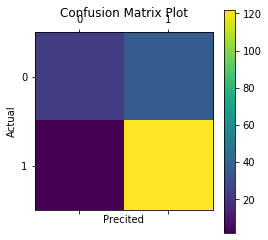

              precision    recall  f1-score   support

           0   0.923077  0.393443  0.551724        61
           1   0.767296  0.983871  0.862191       124

    accuracy                       0.789189       185
   macro avg   0.845186  0.688657  0.706957       185
weighted avg   0.818661  0.789189  0.759821       185

ROC Area Under Curve is : 0.6886567953463776


Text(0.5, 0, 'False Positive Rate')

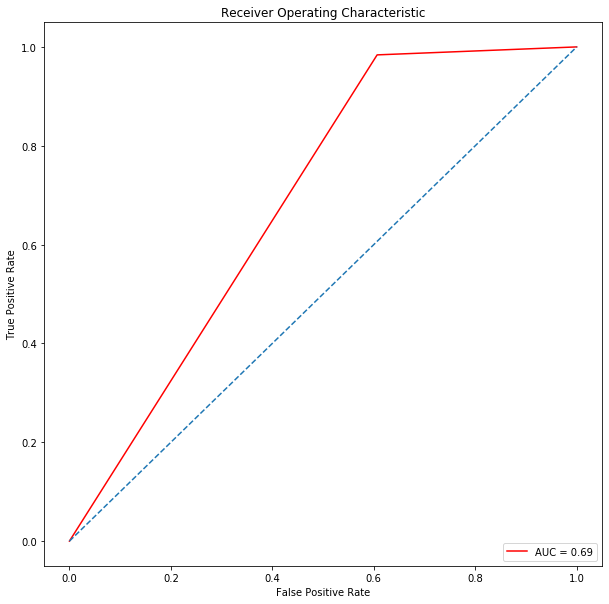

In [81]:
# Making Confusion Matrix

cm = confusion_matrix(y_test, y_pred_lr)
plt.matshow(cm)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Precited')
plt.ylabel('Actual')
plt.show();

print(metrics.classification_report(y_test, y_pred_lr, digits=6))

# ROC Curve

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_lr)
roc_auc_lr = auc(false_positive_rate, true_positive_rate)
print("ROC Area Under Curve is :", roc_auc_lr)

plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Applying k-fold cross validation 

In [82]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_lr, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 81.82 %
Standard Deviation: 3.06 %


## Grid Search

In [83]:
from sklearn.model_selection import GridSearchCV
parameters = [{"C":[0.001, 0.01, 0.1, 1, 10, 100], "penalty":["l1","l2"]}]# l1 lasso l2 ridge]
grid_search = GridSearchCV(estimator = classifier_lr,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)

Best Accuracy: 81.82 %
Best Parameters: {'C': 0.1, 'penalty': 'l1'}


/Users/shubhamsunwalka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


## KNN

In [84]:
# Training the K-NN model on the Training set
from sklearn.neighbors import KNeighborsClassifier
classifier_knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier_knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

Accuracy: 72.99 %
Standard Deviation: 5.14 %
Best Accuracy: 77.16 %
Best Parameters: {'algorithm': 'auto', 'leaf_size': 1, 'n_jobs': -1, 'n_neighbors': 8, 'weights': 'distance'}


/Users/shubhamsunwalka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


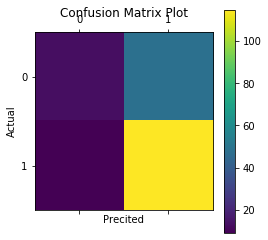

              precision    recall  f1-score   support

           0   0.590909  0.213115  0.313253        61
           1   0.705521  0.927419  0.801394       124

    accuracy                       0.691892       185
   macro avg   0.648215  0.570267  0.557323       185
weighted avg   0.667730  0.691892  0.640439       185

ROC Area Under Curve is : 0.5702670544685351


Text(0.5, 0, 'False Positive Rate')

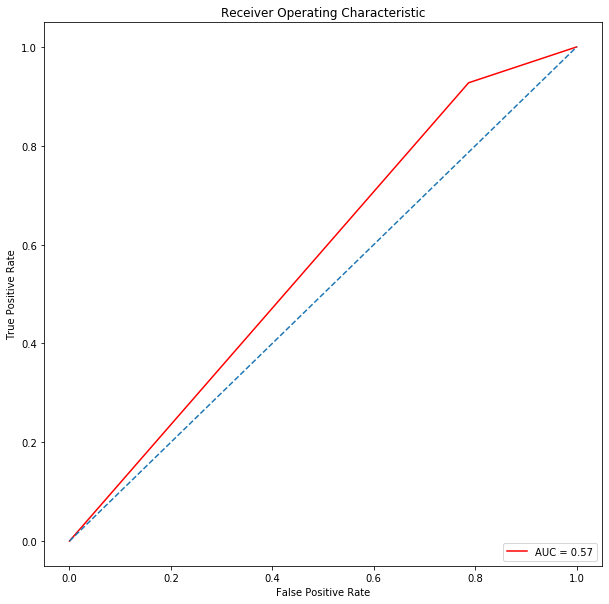

In [85]:

# Predicting the Test set results
y_pred_knn = classifier_knn.predict(x_test)

## Applying K-Fold Cross Validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_knn, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

## Applying Grid Search to find the best model and the best parameters

from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}
grid_search = GridSearchCV(estimator = classifier_knn,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)



from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_knn)
plt.matshow(cm)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Precited')
plt.ylabel('Actual')
plt.show();

print(metrics.classification_report(y_test, y_pred_knn, digits=6))


from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_knn)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Area Under Curve is :", roc_auc)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Random Forest

In [86]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(criterion = 'gini', min_samples_leaf = 3, min_samples_split = 3,
                                       n_estimators = 15, n_jobs = -1, random_state = 123)
classifier_rf.fit(x_train, y_train)

# Predicting the Test set results
y_pred_rf = classifier_rf.predict(x_test)


Accuracy: 81.35 %
Standard Deviation: 3.13 %


/Users/shubhamsunwalka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Accuracy: 82.05 %
Best Parameters: {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 25, 'n_jobs': -1, 'random_state': 123}


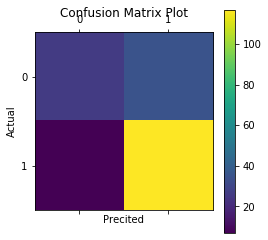

              precision    recall  f1-score   support

           0   0.787879  0.426230  0.553191        61
           1   0.769737  0.943548  0.847826       124

    accuracy                       0.772973       185
   macro avg   0.778808  0.684889  0.700509       185
weighted avg   0.775719  0.772973  0.750676       185

None
ROC Area Under Curve is : 0.6848889476467478


Text(0.5, 0, 'False Positive Rate')

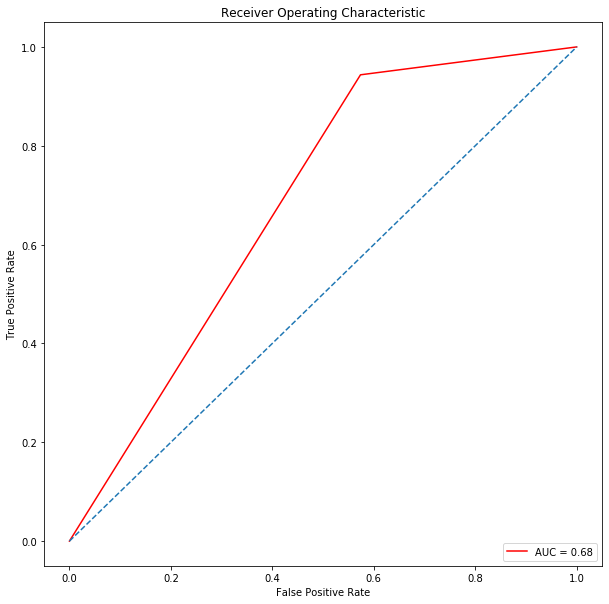

In [87]:
## Applying K-Fold Cross Validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_rf, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

## Applying Grid Search to find the best model and the best parameters

from sklearn.model_selection import GridSearchCV
parameters = {'criterion':['gini','entropy'],
          'n_estimators':[10,15,20,25,30],
          'min_samples_leaf':[1,2,3],
          'min_samples_split':[3,4,5,6,7], 
          'random_state':[123],
          'n_jobs':[-1]}
grid_search = GridSearchCV(estimator = classifier_rf,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)



from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_rf)
plt.matshow(cm)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Precited')
plt.ylabel('Actual')
plt.show();


print(print(metrics.classification_report(y_test, y_pred_rf, digits=6)))

from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_rf)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Area Under Curve is :", roc_auc)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

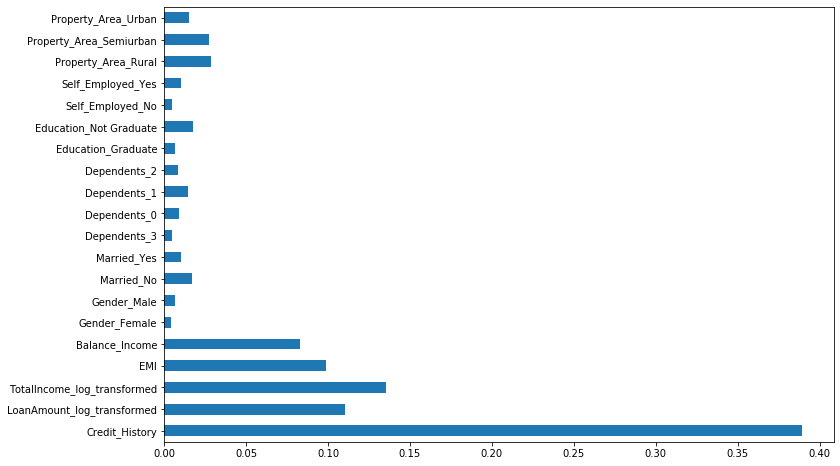

In [88]:
importances = pd.Series(classifier_rf.feature_importances_,index=X1.columns)
importances.plot(kind='barh', figsize=(12,8))

## Decision Tree

In [89]:
# Training the Decision Tree Classification model on the Training set
from sklearn.tree import DecisionTreeClassifier
classifier_dt = DecisionTreeClassifier(max_features ='auto', min_samples_leaf= 1, min_samples_split= 14, random_state =123)
classifier_dt.fit(x_train, y_train)

# Predicting the Test set results
y_pred_dt = classifier_dt.predict(x_test)

Accuracy: 71.81 %
Standard Deviation: 6.20 %


/Users/shubhamsunwalka/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Best Accuracy: 78.09 %
Best Parameters: {'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 15, 'random_state': 123}


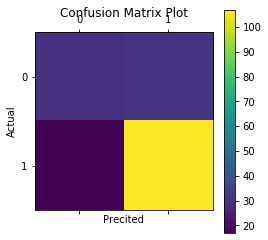

              precision    recall  f1-score   support

           0   0.638298  0.491803  0.555556        61
           1   0.775362  0.862903  0.816794       124

    accuracy                       0.740541       185
   macro avg   0.706830  0.677353  0.686175       185
weighted avg   0.730168  0.740541  0.730656       185

ROC Area Under Curve is : 0.6773532522474881


Text(0.5, 0, 'False Positive Rate')

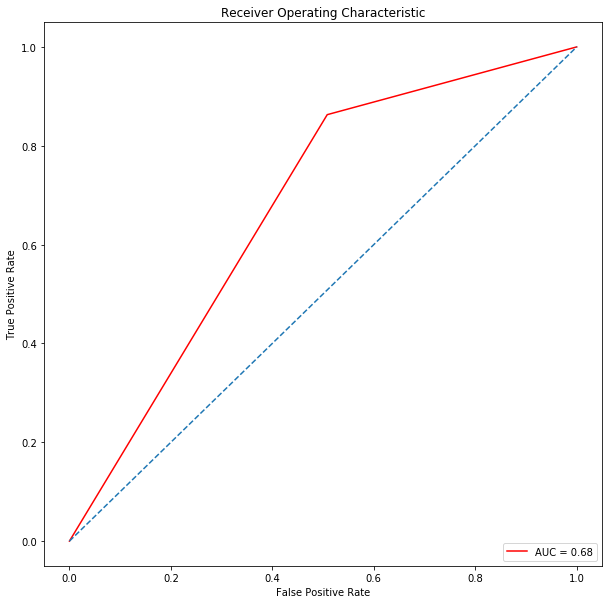

In [90]:
## Applying K-Fold Cross Validation

from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = classifier_dt, X = x_train, y = y_train, cv = 10)
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

## Applying Grid Search to find the best model and the best parameters

from sklearn.model_selection import GridSearchCV
parameters = {'max_features': ['auto', 'sqrt', 'log2'],
          'min_samples_split': [2,3,4,5,6,7,8,9,10,11,12,13,14,15], 
          'min_samples_leaf':[1,2,3,4,5,6,7,8,9,10,11],
          'random_state':[123]}
grid_search = GridSearchCV(estimator = classifier_dt,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)



from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_dt)
plt.matshow(cm)
plt.title('Confusion Matrix Plot')
plt.colorbar()
plt.xlabel('Precited')
plt.ylabel('Actual')
plt.show();

print(metrics.classification_report(y_test, y_pred_dt, digits=6))


from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_dt)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("ROC Area Under Curve is :", roc_auc)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

## Further Scope of Improvement.

- In addition to the work done, further we can Tune the Model More.
- Gather More Dataset for better Learning or can perform Data Augmentation.
- Ensemble Models can be used and Fine Tuned.
- We can think of some additional features for feature engineering.

## Finished 